# water_level_api module

It is possible with the `water_level_api` module to access the Norwegian water level application programming interface (API), which is available under https://vannstand.kartverket.no/tideapi_en.html.

## Water level API wrapper

**water_level_api.py** is a Python wrapper around the Norwegian water level API. 

Following arguments can be chosen by inialization of the WaterLevelApi instance:

| Argument        | Type     | Default     | Description                                            |
| :-------------- | :------- | :---------- | :----------------------------------------------------- |
| date_from       | required |             | Starting date of data period available                 |
| date_to         | required |             | Ending date of data period                             |
| station         | optional |             | 3-digit station identifier of tide gauge. See table below for possible identifiers.  |
| latitude        | optional |             | Latitude of position in [deg]                          |
| longitude       | optional |             | Longitude of position in [deg]                         |
| datatype        | optional | all         | Type of water level data                               |
| reference_level | optional | chart_datum | Reference level of water level data                    |
| interval        | optional | 10          | Data interval in [min]                                 |
| no_annual_tidal | optional | False       | Annual tidal constituent SA is removed from the tidal predictions, if set to True. Note, that this works only, if position arguments `latitude` and `longitude` are used. This option does not work for original `station` tide gauge data. |
| url             | optional | https://vannstand.kartverket.no/tideapi.php | URL to download from water level data|

**It should be noted that either the `station` name of the tide gauge has to be given as argument or the position via `latitude` and `longitude` argument.** If position data are used, then estimated water levels are returned together with predicted tidal and weather effect values (estimated water level = predicted + weather effect). If `station` data are used, then only observed water level and predicted tidal values are returned (weather_effect = observed water level - predicted).

Following `datatype` types can be chosen as argument:

| Option | Description                                            |
| :----- | :----------------------------------------------------- |
| all    | `obs` and `pre` data and in addition tidal forecast if available |
| obs    | observed/estimated water level                         |
| pre    | tidal predictions                                      |
| tab    | tide table with high and low tides                     |

The `reference_level` argument can be given by:

| Option         | Description                                            |
| :------------- | :----------------------------------------------------- |
| chart_datum    | Reference level for depths in navigational charts and heights in tide tables |
| mean_sea_level | The average height of the surface of the sea for all stages of the tide over a 19-year period (1996-2014) |
| nn2000         | Norwegian vertical datum of 2000 |

Following 3-digit tige gauge `station` identifier (ID) can be selected:

| ID  | Name         | Latitude [deg ] | Longitude [deg] |
| :-- | :----------- | :-------------- | :-------------- |
| ANX | Andenes      | 69.326067       | 16.134848       |
| BGO | Bergen       | 60.398046       | 5.320487        |
| BOO | Bodø         | 67.292330       | 14.399770       |
| BRJ | Bruravik     | 60.492094       | 6.893949        |
| HFT | Hammerfest   | 70.664750       | 23.678690       |
| HAR | Harstad      | 68.801261       | 16.548236       |
| HEI | Heimsjøen    | 63.425224       | 9.101504        |
| HRO | Helgeroa     | 58.995212       | 9.856379        |
| HVG | Honningsvåg  | 70.980318       | 25.972697       |
| KAB | Kabelvåg     | 68.212639       | 14.482149       |
| KSU | Kristiansund | 63.113920       | 7.736140        |
| LEH | Leirvik      | 59.766394       | 5.503670        |
| MSU | Mausund      | 63.869331       | 8.665231        |
| MAY | Måløy        | 61.933776       | 5.113310        |
| NVK | Narvik       | 68.428286       | 17.425759       |
| NYA | Ny-Ålesund   | 78.928545       | 11.938015       |
| OSC | Oscarsborg   | 59.678073       | 10.604861       |
| OSL | Oslo         | 59.908559       | 10.734510       |
| RVK | Rørvik       | 64.859456       | 11.230107       |
| SBG | Sandnes      | 58.868232       | 5.746613        |
| SIE | Sirevåg      | 58.505200       | 5.791602        |
| SOY | Solumstrand  | 59.710622       | 10.273018       |
| SVG | Stavanger    | 58.974339       | 5.730121        |
| TRG | Tregde       | 58.006377       | 7.554759        |
| TOS | Tromsø       | 69.646110       | 18.954790       |
| TRD | Trondheim    | 63.436484       | 10.391669       |
| TAZ | Træna        | 66.496624       | 12.088633       |
| VAW | Vardø        | 70.374978       | 31.104015       |
| VIK | Viker        | 59.036046       | 10.949769       |
| AES | Ålesund      | 62.469414       | 6.151946        |

### Use of water level API wrapper

In [ ]:
# Standard library imports
from datetime import datetime

# Third party imports
import numpy as np

# Import Midgard logging module
from midgard.dev import log

# Import water level API wrapper
from midgard.api import water_level_api

# Initialize logging information
#
# Note: If logging module is not initialized, then the additional logging information are not printed.
log.init(log_level="info")

# Define file path of XML file received by water level API
file_path = "../examples/api/water_level_api.xml"

# Get instance of WaterLevelApi class for tide gauge ANX (Andenes) 
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=datetime(2025, 1, 1),
        date_to=datetime(2025, 1, 2),
        station="ANX",
        datatype="all",
        reference_level="mean_sea_level",
        interval=10,
        no_annual_tidal=False,
)

# Get instance of WaterLevelApi class for given location
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=datetime(2025, 1, 1),
        date_to=datetime(2025, 1, 2),
        latitude=69.326067,
        longitude=16.134848,
        datatype="all",
        reference_level="mean_sea_level",
        interval=10,
        no_annual_tidal=False,
)

# Get overview available water level API functions
dir(api)

The water level data can either be saved in a dictionary by using `as_dict()` method or in a Midgard dataset by using `as_dataset()`. Following fields/parameters are saved in the dictionary/dataset:

| Parameter                  | Description                                                                    |
| :------------------------- | :----------------------------------------------------------------------------- |
| flag                       | Data flag of water level observation data (obs: observation, pre: prediction), |
|                            | which can also predicted tidal data                                            |
| time                       | Observation time                                                               |
| water_level                | Observed/estimated water level data in [m]                                     |
| water_level_predicted      | Tidal prediction data in [m]                                                   |
| water_level_weather_effect | Weather effect [m]                                                             |

In [2]:
# Get data as dictionary
data = api.as_dict()

# Get data as dataset
dset = api.as_dataset()

The type of the water level data can by chosen by inialization of the WaterLevelApi instance with the `datatype` argument. That means the tidal data can also be selected via `datatype` argument as shown in the following example:

In [3]:
# Get only tidal prediction data
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=datetime(2025, 1, 1),
        date_to=datetime(2025, 1, 2),
        latitude=69.326067,
        longitude=16.134848,
        datatype="pre",
)

# Get data as dictionary
data = api.as_dict()

INFO  Downloading https://vannstand.kartverket.no/tideapi.php?fromtime=2025-01-01T00:00&totime=2025-01-02T00:00&datatype=pre&uncertainty=0&refcode=cd&place=&file=&lang=en&interval=10&dst=0&tzone=0&lat=69.326067&lon=16.134848&tide_request=locationdata to ../examples/api/water_level_api.xml


In following the water level data for the Andenes location are plotted. The sum of the predicted tide and the weather effect is the observed water level.

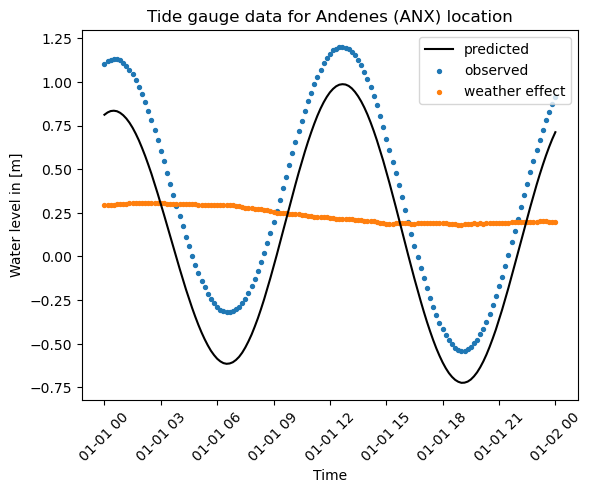

In [4]:
# Import matplotlib module
import matplotlib.pyplot as plt

# Plot data
plt.plot(
        dset.time.datetime, 
        dset.water_level_predicted, 
        label="predicted",
        color="black",
)
plt.scatter(
        dset.time.datetime, 
        dset.water_level, 
        label="observed",
        s=8,
)
plt.scatter(
        dset.time.datetime, 
        dset.water_level_weather_effect, 
        label="weather effect",
        s=8,
)
plt.title(
    f"Tide gauge data for Andenes (ANX) location"
)
plt.xlabel("Time")
plt.ylabel("Water level in [m]")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

#### Use pf annual tidal constituent SA
In following is shown, what is the difference of the predicted tide if the annual tidal constituent SA is used or not. The use of 'no_annual_tidal' option has only an effect on the predicted tides (given by field **water_level_predicted**) and not the final water level observations (given by field **water_level**).

INFO  Downloading https://vannstand.kartverket.no/tideapi.php?fromtime=2025-01-01T00:00&totime=2025-12-02T00:00&datatype=all&uncertainty=0&refcode=nn2000&place=&file=&lang=en&interval=10&dst=0&tzone=0&lat=69.326067&lon=16.134848&tide_request=locationdata to ../examples/api/water_level_api.xml
INFO  Downloading https://vannstand.kartverket.no/tideapi.php?fromtime=2025-01-01T00:00&totime=2025-12-02T00:00&datatype=all&uncertainty=0&refcode=nn2000&place=&file=&lang=en&interval=10&dst=0&tzone=0&flag=nosa&lat=69.326067&lon=16.134848&tide_request=locationdata to ../examples/api/water_level_api.xml


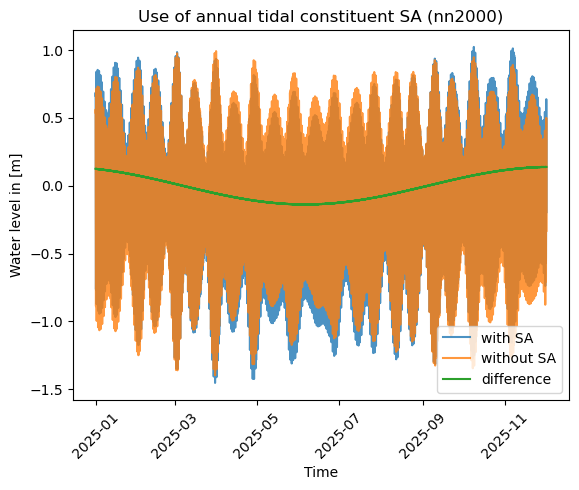

In [5]:
# Import matplotlib module
import matplotlib.pyplot as plt

# Configuration
date_from = datetime(2025, 1, 1)
date_to = datetime(2025, 12, 2)
datatype = "all"  # Choose between 'all', 'obs' and 'pre'
field_to_plot = "water_level_predicted"  # Choose between water_level (only with 'all' and 'obs' data type) and 
                                         # water_level_predicted (only with 'all' and 'pre' data type)
file_path = "../examples/api/water_level_api.xml"
reference_level = "nn2000"  # Choose between chart_datum, mean_sea_level or nn2000

# Get instance of WaterLevelApi class for given location WITHOUT using annual tidal SA coefficients
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=date_from,
        date_to=date_to,
        latitude=69.326067,
        longitude=16.134848,
        #station="ANX",
        datatype=datatype,
        reference_level=reference_level,
        interval=10,
        no_annual_tidal=False,
)

# Get data as dataset
dset_sa = api.as_dataset()

# Get instance of WaterLevelApi class for given location BY using annual tidal SA coefficients
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=date_from,
        date_to=date_to,
        latitude=69.326067,
        longitude=16.134848,
        #station="ANX",
        datatype=datatype,
        reference_level=reference_level,
        interval=10,
        no_annual_tidal=True,
)

# Get data as dataset
dset_no_sa = api.as_dataset()

# Plot data
plt.plot(
        dset_sa.time.datetime, 
        dset_sa[field_to_plot], 
        label="with SA",
        alpha=0.8,
)
plt.plot(
        dset_no_sa.time.datetime, 
        dset_no_sa[field_to_plot], 
        label="without SA",
        alpha=0.8,
)
plt.plot(
        dset_sa.time.datetime, 
        dset_sa[field_to_plot] - dset_no_sa[field_to_plot], 
        label="difference",
)
plt.title(height
    f"Use of annual tidal constituent SA ({reference_level})"
)
plt.xlabel("Time")
plt.ylabel("Water level in [m]")
plt.xticks(rotation=45) 
plt.legend()
plt.show()


#### Difference between observed and estimated tide gauge data
In following is shown, what is the difference if the water level information is provided directly from the tide gauge by using **station** option or estimated for a given position given by **latitude/longitude** option. For example **no_annual_tidal** option is not applied, if **station** option is used by Norwegian water level API.

INFO  Downloading https://vannstand.kartverket.no/tideapi.php?fromtime=2025-01-01T00:00&totime=2025-12-02T00:00&datatype=all&uncertainty=0&refcode=msl&place=&file=&lang=en&interval=10&dst=0&tzone=0&flag=nosa&stationcode=ANX&tide_request=stationdata to ../examples/api/water_level_api.xml
INFO  Downloading https://vannstand.kartverket.no/tideapi.php?fromtime=2025-01-01T00:00&totime=2025-12-02T00:00&datatype=all&uncertainty=0&refcode=msl&place=&file=&lang=en&interval=10&dst=0&tzone=0&flag=nosa&lat=69.326067&lon=16.134848&tide_request=locationdata to ../examples/api/water_level_api.xml


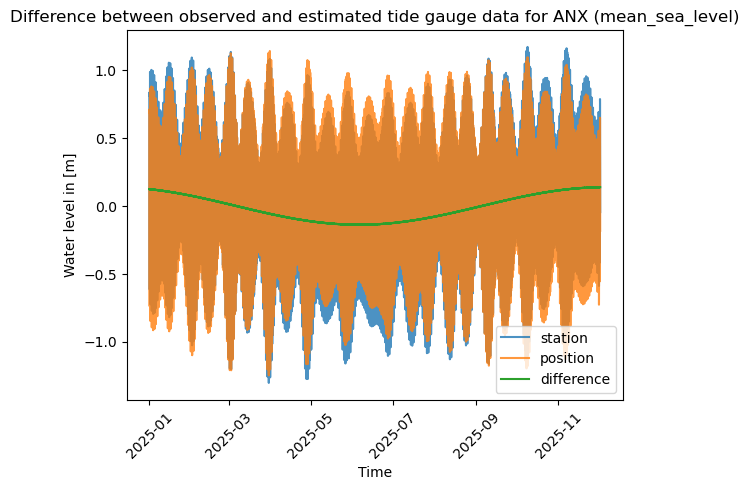

In [6]:
# Import matplotlib module
import matplotlib.pyplot as plt

# Configuration
date_from = datetime(2025, 1, 1)
date_to = datetime(2025, 12, 2)
datatype = "all"  # Choose between 'all', 'obs' and 'pre'
field_to_plot = "water_level_predicted"  # Choose between water_level (only with 'all' and 'obs' data type) and 
                                         # water_level_predicted (only with 'all' and 'pre' data type)
reference_level = "mean_sea_level"  # Choose between chart_datum, mean_sea_level or nn2000


# Get instance of WaterLevelApi class for given tide gauge name
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=date_from,
        date_to=date_to,
        station="ANX",
        datatype=datatype,
        reference_level=reference_level,
        interval=10,
        no_annual_tidal=True,
)

# Get data as dataset
dset_sta = api.as_dataset()

# Get instance of WaterLevelApi class for given location 
api = water_level_api.WaterLevelApi(
        file_path=file_path,
        date_from=date_from,
        date_to=date_to,
        latitude=69.326067,
        longitude=16.134848,
        datatype=datatype,
        reference_level=reference_level,
        interval=10,
        no_annual_tidal=True,
)

# Get data as dataset
dset_pos = api.as_dataset()

# Plot data
plt.plot(
        dset_sta.time.datetime, 
        dset_sta[field_to_plot], 
        label="station",
        alpha=0.8,
)
plt.plot(
        dset_pos.time.datetime, 
        dset_pos[field_to_plot], 
        label="position",
        alpha=0.8,
)

plt.plot(
        dset_sta.time.datetime, 
        dset_sta[field_to_plot] - dset_pos[field_to_plot], 
        label="difference",
)
plt.title(
    f"Difference between observed and estimated tide gauge data for ANX ({reference_level})"
)
plt.xlabel("Time")
plt.ylabel("Water level in [m]")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

#### Convert water level observations related to NN2000 to ellipsoidal height given in ITRF2014 (current epoch)
In the following the steps are shown how to convert water level observations related to NN2000 to ellipsoidal height given in ITRF2014 (current epoch) and a mean-tide Earth tide system. As an example the tide gauge station **Andenes (ANX)** is used.

In [1]:
# Standard library imports
from datetime import datetime

# Third party imports
import numpy as np

# Midgard imports
from midgard import parsers
from midgard.api import transformation_api, water_level_api
from midgard.dev import log
from midgard.math import spatial_interpolation
from midgard.math.unit import Unit

# Define input parameters for Andenes tide gauge
date_from = datetime(2025, 1, 1)
date_to = datetime(2025, 12, 2)
latitude = 69.326067 # in [deg] related to EUREF89 for tide gauge station ANX
longitude = 16.134848 # in [deg] related to EUREF89 for tide gauge station ANX
h_tgz_nn2000 = -2.111  # Tide gauge zero for ANX tide gauge given in NN2000 [m]. Information is collected from internal NMA tide database.
epoch_current = 2025.6

# Initialize logging information
#
# Note: If logging module is not initialized, then the additional logging information are not printed.
log.init(log_level="info")

# Define spatial interpolation function used later in the notebook
def grid_interpolation(file_path, latitude, longitude):
    """Spatial interpolation based on GRAVSOFT grid file

    Args:
        file_path: File path of GRAVSOFT grid file
        Latitude:  Latitude in [deg]
        Longitude:  Longitude in [deg]

    Returns:
        Interpolated value based on given grid information
    """
    p = parsers.parse_file(parser_name="gravsoft_grid", file_path=file_path)
    data = p.as_dict()
    
    # Arrange grid data for spatial interpolation
    num_rows = len(data["latitude"])
    num_cols = len(data["longitude"])
    grid_lon = np.repeat([data["longitude"]], num_rows, axis=0)
    grid_lat = np.repeat(np.array([data["latitude"]]).T, num_cols, axis=1)
    
    value = spatial_interpolation.interpolate(
                grid_x = grid_lon, 
                grid_y = grid_lat, 
                values = data["data"], 
                x = longitude, 
                y = latitude,
                kind = "regular_grid_interpolator",
    )

    return value[0]

##### 1. Convert tide gauge zero height from NN2000 to EUREF89 by using HREF
The **Height Reference model (HREF)** model describes the difference between the ellipsoidal height in EUREF89 and the national Norwegian height system NN2000. The HREF offset is determined and used to convert the NN2000 height of the **tide gauge zero (TGZ)** to EUREF89.

In [2]:
# Convert tide gauge zero height from NN2000 to EUREF89 by using HREF
href_nn2000_to_euref89 = grid_interpolation(
            file_path="../examples/math/HREF2018B_NN2000_EUREF89.gri",
            latitude=latitude,
            longitude=longitude,
)
log.info(f"HREF offset is {href_nn2000_to_euref89:.3f} m based on interpolation for longitude {longitude:.2f} and latitude {latitude:.2f} in [deg].")

h_tgz_euref89 = h_tgz_nn2000 + href_nn2000_to_euref89
log.info(f"Tide gauge zero in EUREF89: {h_tgz_euref89:.3f} m")

INFO  HREF offset is 35.560 m based on interpolation for longitude 16.13 and latitude 69.33 in [deg].
INFO  Tide gauge zero in EUREF89: 33.449 m


##### 2. Convert tide gauge zero from EUREF89 to ITRF2014 epoch 2010.0 by using Midgard wrapper around transformation API

In [3]:
# Get instance of TransformationApi class with transformation API methods
api = transformation_api.TransformationApi()

_, _, h_tgz_itrf2014_tf = api.transform(
            x = longitude,
            y = latitude,
            z = h_tgz_euref89,
            t = 2010.0,  # Note: In principle could the transformation be carried out to epoch_current. Then step 4 is not necessary. 
            from_epsg = 4937,  # EPSG code for geodetic 3D coordinate system for EUREF89
            to_epsg = 7912,  # EPSG code geodetic 3D coordinate system for ITRF2014
)

log.info(f"Tide gauge zero in ITRF2014 epoch 2010.0: {h_tgz_itrf2014_tf:.3f} m")

INFO  Tide gauge zero in ITRF2014 epoch 2010.0: 33.477 m


##### 3. Convert tide gauge zero from tide-free to mean-tide system
Height and gravity observations include permanent tidal effects. These observations are related to different tidal systems in dependency of applied tide corrections. It is distinguished between three tidal systems:
- **non-tidal**/**tide-free**: All tidal effects are eleminated from the Earth's shape, that means both the direct tidal attractions of external bodies (the Moon, the Sun, and the planets) and the Earth's elastic response (indirect effect).
    *Example: ITRF solutions, TGZ height*
- **mean-tide**: The permanent tidal effect is kept by the shape of the Earth.
    *Example: Altimetry satellite sea surface heights, tide gauge water level*
- **zero-tide**: It eliminates the direct effect from the Earth's shape, but keeps the indirect effect.
    *Example: NN2000*

In [4]:
# Convert tide gauge zero height from tide-free to mean-tide system

# 1. Method is based on:
# "Systemer for permanent tidejordeffekt" section in K. Breili et al., Felles referanseramme for sjø og land - fase 2, 2020, Rapport 19-04811-3
sin_lat = (1/3 - np.sin(latitude*Unit.deg2rad)**2)
h_tgz_itrf2014_mt = h_tgz_itrf2014_tf + 0.180923826 * sin_lat * (1 + 0.00124 * sin_lat)

# 2. Method is based on:
# "Tidal Systems" section by J. Mäkinen in M. G. Sideris (ed.), Encyclopedia of Geodesy, Encyclopedia of Earth Sciences Series, 2025
# https://doi.org/10.1007/978-3-319-02370-0_70-1
sin_lat = np.sin(latitude * Unit.deg2rad)
h_tgz_itrf2014_mt2 = h_tgz_itrf2014_tf + (60.34 - 179.01 * sin_lat**2 - 1.82 * sin_lat**4) * Unit.mm2m
log.info(f"Tide gauge zero in ITRF2014 epoch 2010.0 and mean-tide system: {h_tgz_itrf2014_mt:.3f} m/{h_tgz_itrf2014_mt2:.3f} m")

INFO  Tide gauge zero in ITRF2014 epoch 2010.0 and mean-tide system: 33.379 m/33.379 m


##### 4. Use NKG land uplift model NKG2016LU_abs for conversion to current epoch

In [5]:
# Get height velocity for given position based on NKG2016LU_abs model
h_vel = grid_interpolation(
            file_path="../examples/math/NKG2016LU_abs.gri",
            latitude=latitude,
            longitude=longitude,
)
log.info(f"Height velocity is {h_vel:.3f} mm/a based on interpolation for longitude {longitude:.2f} and latitude {latitude:.2f} in [deg].")

h_tgz_itrf2014 = h_tgz_itrf2014_mt + h_vel * Unit.mm2m * (epoch_current - 2010.0)
log.info(f"Tide gauge zero in ITRF2014 epoch {epoch_current} and mean-tide system: {h_tgz_itrf2014:.3f} m")

INFO  Height velocity is 1.690 mm/a based on interpolation for longitude 16.13 and latitude 69.33 in [deg].
INFO  Tide gauge zero in ITRF2014 epoch 2025.6 and mean-tide system: 33.405 m


##### 5. Relate the water level to ellipsoidal water level

In [6]:
# Get water level in NN2000
api = water_level_api.WaterLevelApi(
        file_path="../examples/api/water_level_api.xml",
        date_from=date_from,
        date_to=date_to,
        latitude=latitude,
        longitude=longitude,
        datatype="all",
        reference_level="nn2000",
        interval=10,
        no_annual_tidal=True,
)

dset_wl_nn2000 = api.as_dataset()

# Refer water level to tide gauge zero
wl_tgz = dset_wl_nn2000.water_level - h_tgz_nn2000
wl_predicted_tgz = dset_wl_nn2000.water_level_predicted - h_tgz_nn2000

# Determine water level in ellipsoidal heights
wl_tgz_itrf2014 = h_tgz_itrf2014 + wl_tgz
wl_predicted_tgz_itrf2014 = h_tgz_itrf2014 + wl_predicted_tgz

INFO  Downloading https://vannstand.kartverket.no/tideapi.php?fromtime=2025-01-01T00:00&totime=2025-12-02T00:00&datatype=all&uncertainty=0&refcode=nn2000&place=&file=&lang=en&interval=10&dst=0&tzone=0&flag=nosa&lat=69.326067&lon=16.134848&tide_request=locationdata to ../examples/api/water_level_api.xml


##### 6. Plot water level related to tide gauge zero

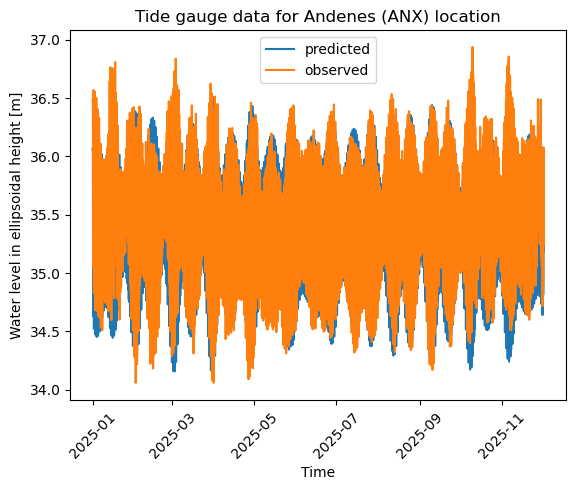

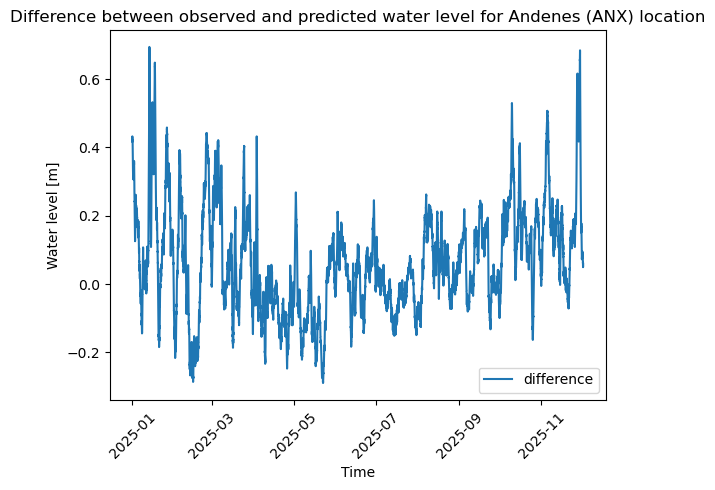

In [7]:
# Import matplotlib module
import matplotlib.pyplot as plt

# Plot data
plt.plot(
        dset_wl_nn2000.time.datetime, 
        wl_predicted_tgz_itrf2014, 
        label="predicted",
        alpha=0.8,
)
plt.plot(
        dset_wl_nn2000.time.datetime, 
        wl_tgz_itrf2014, 
        label="observed",
        alpha=0.8,
)
plt.title(
    f"Tide gauge data for Andenes (ANX) location"
)
plt.xlabel("Time")
plt.ylabel("Water level in ellipsoidal height [m]")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

plt.title(
    f"Difference between observed and predicted water level for Andenes (ANX) location"
)
plt.plot(
        dset_wl_nn2000.time.datetime, 
        wl_tgz_itrf2014 - wl_predicted_tgz_itrf2014, 
        label="difference",
)
plt.xlabel("Time")
plt.ylabel("Water level [m]")
plt.xticks(rotation=45) 
plt.legend()
plt.show()

In [8]:
# Write water level solution to a file
np.savetxt(
    "../examples/parsers/ande_water_level.csv",
    np.column_stack([dset_wl_nn2000.time.decimalyear, wl_tgz_itrf2014]),
    comments="",
    delimiter=",",
    header="time, water_level",
)